# Wilks' Theorem Exploration

> In Module 5, we were given, without proof, Wilks' Theorem which says that 
$$-2 \ln \lambda(\vec{X}) \rightarrow \chi^{2}(1),$$ under the assumption that $H_{0}$ is true.
>
>In this lab, we are going to explore this claim with some simulated experiments.

> First, we will generate a large Pareto sample. There is no built in "rpareto" function in the base distribution package of R. We are going to generate our sample using the "inverse cdf method". The Pareto cdf is
$$F(x)=1-\frac{1}{(1+x)^{\gamma}}.$$
>
>One can prove that if $U \sim unif(0,1)$, $F^{-1}(U)$, which is random, has the distribution described by $F$.
>
> For the Pareto cdf, the inverse cdf is $$F^{-1}(x) = (1-x)^{-1/\gamma}-1.$$
>
> Generate a Pareto($\gamma=1.8$) sample of size 1000 by typing the following lines and running the cell.

`n<-1000`

`gamma<-1.8`

`u<-runif(n)`

`mysample<-(1-u)^(-1/gamma)-1`

> Let's make a histogram of the sample. Because the Pareto distribution will likely have some large outliers that will stretch the x-axis out and make the histogram almost unreadable, we will make a full histogram but only plot the part that falls between 0 and 5.
>
>Type and run the following code.

`br<-seq(0,ceiling(max(mysample)),0.5)`

`hist(mysample,prob=T,breaks=br,xlim=c(0,5))`

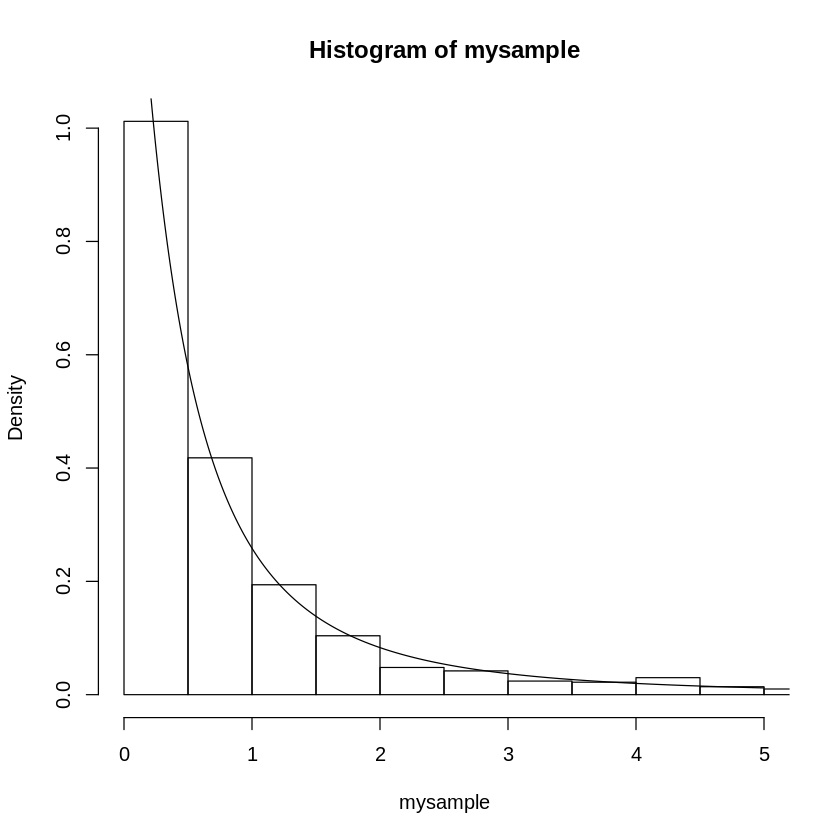

> Return to the above cell to superimpose the Pareto density on the histpogram by typing the following lines under your "hist statement". Does it fit?

`x<-seq(0,5,0.01)`

`f<-gamma/(1+x)^(gamma+1)`

`lines(x,f)`

>Moving on to the next cell, lets find the generalized likelihood ratio for testing $$H_{0}: \gamma=1.8 \,\,\,\, \text{versus} \,\,\,\, H_{1}: \gamma \ne 1.8$$. 
>
> Find the unrestricted MLE, as given in Lesson 2 of Module 5.

`mle<-n/sum(log(1+mysample))`
> Specify the restricted MLE:

`mle0<-1.8`
> Compute the numerator and denominator for the GLR by typing

`x<-seq(0,5,0.01)`

 `numer<-((mle0)^n)/(prod(1+mysample)^(mle0+1))`

 `denom<-((mle)^n)/(prod(1+mysample)^(mle+1))`

> Type the following to see the values.

`numer`

`denom`


[1] 0

[1] 0

> You are likely seeing zeros because these numbers are very vary small and you are experiencing underflow error!
>
> We were going to find $-2 \ln \lambda(\vec{x})$ by typing

`teststat<-(-2*log(numer/denom))`
> but the underflow error will cause this to be undefined!
>
> To counter this error, we will write down an expression for $L(\widehat{\gamma}_{0})/L(\widehat{\gamma}) = L(\text{mle0})/L(\text{mle})$, and simplify it to 
$$\left( \frac{\text{mle0}}{\text{mle}} \right)^{n} \left[ \prod_{i=1}^{n}(1+x_{i}) \right]^{\text{mle-mle0}},$$
> rather than computing the numerator and denominator separately.
>
> Find and view the GLR ratio by typing

`ratio<-((mle0/mle)^n)*(prod((1+mysample)^(mle-mle0)))`

`ratio`

[1] 0.8973683

>Compute and view the test statistic by typing

`teststat<-(-2*log(ratio))`

`teststat`


[1] 0.2165778

> `teststat` is supposed to have an approximate $\chi^{2}(1)$ distribution.
>
> To see this, we will repeat the entire experiment 10,000 times, make a histogram of the results, and superimpose the $\chi^{2}(1)$ pdf.
>
> In the next cell, create a vector to hold the results by typing

`reps<-10000`

`results<-rep(0,reps)`


> Let's redo the entire experiment 10,000 times using a "for loop".
>
`for(i in 1:reps){`

`u<-runif(n)`

`mysample<-(1-u)^(-1/gamma)-1`

`mle<-n/sum(log(1+mysample))`

`ratio<-((mle0/mle)^n)*(prod((1+mysample)^(mle-mle0)))`

`teststat<-(-2*log(ratio))`

`results[i]<-teststat`

`}`


> Make a histogram of the results by typing

`br<-seq(0,ceiling(max(results)),1)`

`hist(results,prob=T,breaks=br)`

> Aside: In all given histogram commands, I am giving the bin/break widths after making several histograms myself and picking one that will give a nice plot!

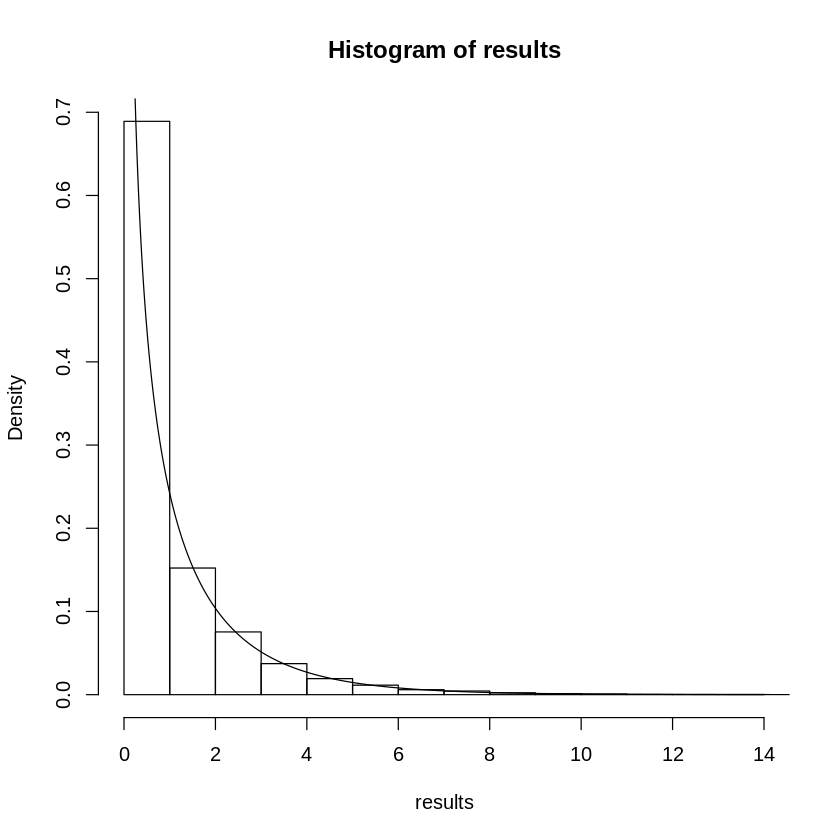

> Go back into the last code block and superimpose the $\chi^{2}(1)$ density by typing:

`x<-seq(0,40,0.001)`

`alpha<-1/2`

`beta<-1/2`

`f<-(1/gamma(alpha))*(beta^alpha)*(x^(alpha-1))*exp(-beta*x)`

`lines(x,f)`

> How did we do?

> While we're here with this glorious results vector, let's check out the level of significance of this test! We know that the samples were generated using the null hypothesis value. So, we should fail to reject $H_{0}$ "most of the time".
>
>In particular, for a test of size $\alpha$, we should actually make a Type I error and reject $100 \alpha \%$ of the time.
>
> What percentage of our samples caused a Type I error when $\alpha=0.05$? We reject $H_{0}$ every time we get a result above $\chi^{2}_{0.05,1}$. Find this proportion by typing and running

`length(results[results>qchisq(0.95,1)])/length(results)`

> How satisfying!